## Escola Politécnica da Universidade de São Paulo

<img src="http://www.imagens.usp.br/wp-content/uploads/EP.jpg" height="50" width="200">

### PEA 3306 - Conversão Eletromecânica de Energia

### Exercício Computacional 1

#### Autores: Guilherme Marques (10335336), Lucas Penna Saraiva (9770566) e Stefan R. Raposo (NUSP)
#### Professor Dr. Luiz Lebensztajn

**Enunciado:**
Um transformador monofásico abaixador de núcleo ferromagnético (suposto linear) possui os seguintes
valores nominais: 400 kVA, 5.000/320 V, 50 Hz. São conhecidos seus parâmetros de curto circuito, como segue:

• Enrolamento Primário: R1 = 0,5 (Ohm), L1 = 2,14 (mH) (Alta Tensão)

• Enrolamento Secundário: R2 = 0,001 (Ohm), L2 = 4,3 (mH) (Baixa Tensão)

Com o lado da alta tensão em vazio, esse transformador absorve corrente de 60 A e potência 2500 W sob tensão nominal no lado da baixa tensão.
Neste trabalho, pede-se traçar as curvas características de desempenho deste transformador quando em carga: Rendimento e Regulação, quando este opera sob tensão nominal no secundário.

## 1. Cálculo dos parâmetros do circuito equivalente do transformador real e linear

### 1.1 Parâmetros em Comum (Rp e Xm)

Dados do enunciado para o Ensaio em Vazio (condição em que o lado da Alta Tensão é aberto):

- Po = 2500[W]
- Io = 60 [A]
- Vo = 320 [V] (tensão do lado BT)

Com estes dados, podemos determinar a Reatância de Magnetização Xm e a Resistência de Perda Rp do transformador, conforme faremos abaixo.


In [53]:
import math
import numpy as np

Po = 2500 # [W]
Io = 60 # [A]
V1 = 5000   # [V]
V2 = 320    # [V]

# Determinar o valor de a (relação de transformação)
# A carga está conectada no lado de baixa tensão, então o primário é o enrolamento 1 (alta tensão)

a = V1/V2

# Determinar a Resistência de Perda Rp

Rp = (V2**2)/Po

# Determinar Reatância de Magnetização

# 1. Calculo do módulo da Corrente Ip que passa por Rp

Ip = V2/Rp

# 2. Determinar o módulo Corrente de Magnetização Im (que passa pelo Indutor de Magnetização)
# a partir da expressão soma vetorial de Ip + Im = Io

Im = math.sqrt((Io**2) - (Ip**2))

#3. Determinar o módulo da Reatância de Magnetização

Xm = Vo/Im

## Refletir Rp e Xm pelo lado da alta tensão

Rp_linha = Rp*(a**2)
Xm_linha = Xm*(a**2)

print("A Resistẽncia de Perda Rp refletida no primário calculada é: %f [Ohm]" % Rp_linha)
print("A Reatância de Magnetização Xm refletida no primário calculada é: j%f [Ohm]" % Xm_linha)

A Resistẽncia de Perda Rp refletida no primário calculada é: 10000.000000 [Ohm]
A Reatância de Magnetização Xm refletida no primário calculada é: j1313.263598 [Ohm]


### 1.2 Lado da Baixa Tensão

Os dados fornecidos no enunciado são referentes aos parâmetros de curto-circuito. Assim, para a Baixa Tensão vale:

- R2 = 0.001 [Ohm] (resistência do enrolamento 2)
- L2 = 4.3E-6 [H] (indutância de dispersão 2)
- Frequência nominal: 50 [Hz]

A partir desses dados, podemos determinar L'd2 e R'2, ou seja, a Indutância de Dispersão 2 e a Resistência do Enrolamento 2 ambas refletidas no lado de Alta Tensão do transformador. Essas grandezas são refletidas pelo fator a = V1/V2.

In [5]:
R2 = 0.001  # [Ohm]
L2 = 4.3e-6 # [H]

# Determinar R'2

R_2_linha = (a**2)*R2

# Determinar L'2

L_2_linha = (a**2)*L2

# Determinar Xd2' ( |Xd2'| = wL)

Xd_2_linha = 2*math.pi*50*L_2_linha

print("A Resistência do Enrolamento de Baixa Tensão refletida no lado de Alta Tensão R_2_linha é: %f [Ohm]" % R_2_linha)
print("A Reatância de Dispersão do Enrolamento de Baixa Tensão refletida no lado de Alta Tensão Xd_2_linha é: %f [Ohm]" % Xd_2_linha)

A Resistência do Enrolamento de Baixa Tensão refletida no lado de Alta Tensão R_2_linha é: 0.244141 [Ohm]
A Reatância de Dispersão do Enrolamento de Baixa Tensão refletida no lado de Alta Tensão Xd_2_linha é: 0.329806 [Ohm]


### 1.3 Lado da Alta Tensão

No circuito equivalente, os parâmetros da Alta Tensão são os mesmos fornecidos pelo enunciado (referentes ao enrolamento 1). Isso ocorre pois esses parâmetros não têm necessidade de serem refletidos. Dessa forma:

- R1 = 0.5 [Ohm] (Resistência de Dispersão do enrolamento 1)
- L1 = 2.14 [mH] (Indutância de Dispersão do enrolamento 1)

In [8]:
R1 = 0.5

# Determinando a Reatância de Dispersão 1 Xd1 baseado em L1:

L1 = 2.14e-3

Xd1 = 2*math.pi*50*L1

print("A Reatância de Dispersão do Enrolamento de Alta Tensão é: %f [Ohm]" % Xd1)
print("A resistência da bobina 1 é: %f [Ohm]" % R1)

A Reatância de Dispersão do Enrolamento de Alta Tensão é: 0.672301 [Ohm]
A resistência da bobina 1 é: 0.500000 [Ohm]


### 1.4 Esboço do Modelo de Circuito Equivalente para o Transformador Real


### ARRUMAR DESENHO
      
<img src="Circ_Fluxo_Nao_Constante.png">

### 1.5 Tabela dos parâmetros do Circuito Equivalente para o Transformador Real

In [131]:
import pandas as pd

tabela_de_componentes = pd.read_csv('tabela.csv')
tabela_de_componentes.head(7)

,Componente,Valor [Ohm]
0,Rp’,10000.0000
1,Xm’,1313.2000
2,R2’,0.2441
3,X2’,0.3298
4,R1,0.5000
5,X1,0.6723


## 2. Rendimento $\eta$ e Regulação do Transformador $\delta$

### 2.1 Cálculo do Rendimento

Primeiramente, o rendimento no transformador pode ser calculado da seguinte maneira:

## $\eta$ = $\frac{Pu}{Pu + Pf + Pc}$

Onde:

- **P_**: Potência de saída do transformador (potência ativa que cai sobre a carga ligada ao TRAFO);

- **Pf**: Perdas no núcleo (ferro), por correntes parasitas e por histerese; 

- **Pc**: Perdas no cobre: Pcu (perdas ôhmicas) 

Podemos reescrever a expressão do rendimento considerando os seguintes cálculos de perdas de potência ativa:

- Potência de Saída: Pu = V2 $\times$ I2$ \times$ cos($\phi$)

Onde V2 é a tensão que cai sob a carga e é constante, pois se trata da tensão nominal de abaixamento do transformador;
I2 é a corrente que passa pela carga e deverá ser variada;

- Perda no núcleo: Pf = Rp $\times$ Ip²

As perdas no núcleo podem ser determinadas a partir dos parâmetros do circuito equivalente Rp (Resistência de Perda no Núcleo) e a corrente Ip (corrente que passa pelo Rp), ambos calculados acima.

Além disso, considera-se que as perdas no núcleo se mantenham constante, independentemente da variação da corrente I2 da carga;

- Perdas no cobre: Pcu = (R2') $\times$ (I2')² + (R1) $\times$ (I1)²

Dessa forma, a expressão pode ser reescrita como:

## $\eta$ = $\frac{Potencia_U}{Potencia_U + Perda_C + Perda_F}$

A Potência Útil em plena carga (nominal) é:

P_útil = 400kVA;

Como deve-se variá-la de 30% a 150%, então:

P_min = 120kVA

P_max = 600 kVa

In [114]:
### Determinar o vetor de razão entre potência nominal e potência útil
Potencia_Sobre_Nominal = []
Rendimento = []

potencia_util = 400000

for potencia_variada in range(120000, 600000):
    
    Potencia_Sobre_Nominal.append(potencia_variada/potencia_util)
    
## Determinar o vetor de rendimento para cada potência 

cos_fi = -0.8
    
for potencia_variada in range(120000, 600000):
    
    I_2_linha = potencia_variada/(V2*a*cos_fi)

    potencia_ferro = Rp*(Ip**2) ## aprox. constante p/ baixas frequências
    
    Im_linha = V1/Xm_linha # Considerando que a tensão que caia sobre a Indutância de Magnetização seja a tensão do primário
    
    I1 = math.sqrt((I_2_linha**2)+(Im_linha**2))
    
    potencia_cobre = 2*R_2_linha * (I_2_linha**2)
    
    eta = (potencia_variada)/(potencia_variada + potencia_ferro + potencia_cobre)
    
    Rendimento.append(eta)
    
Potencia_Sobre_Nominal = np.array(Potencia_Sobre_Nominal)
Rendimento = np.array(Rendimento)

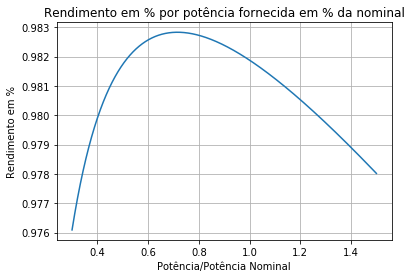

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

## em posse dos valores de Rendimento, vamos plotar o gráfico
plt.title("Rendimento em % por potência fornecida em % da nominal")
plt.xlabel("Potência/Potência Nominal")
plt.ylabel("Rendimento em %")
plt.grid(True)
plt.plot(Potencia_Sobre_Nominal, Rendimento)

In [116]:
Max_Rendimento = Rendimento.max()
print("O máximo rendimento do transformador é: %f" % Max_Rendimento)

O máximo rendimento do transformador é: 0.982831


### 2.2 Cálculo da Regulação

O cálculo da regulação é dado por:

## $\beta$ = $\frac{V2O-Vcarga}{Vcarga}$

Em que V20 é a tensão no secundário com os terminais da carga em aberto e Vcarga é a tensão que cai sobre a carga.

In [117]:
regulacao = []

for potencia_variada in range(120000, 600000):
    
    I2 = potencia_variada/(V2*cos_fi)
    
    Z = math.sqrt((R2**2) + ((2*math.pi*50*L2)**2))
    
    tensao_variada = Z*I2
    
    r = (320 - tensao_variada)/tensao_variada
    
    regulacao.append(r)
    
regulacao = np.array(regulacao)

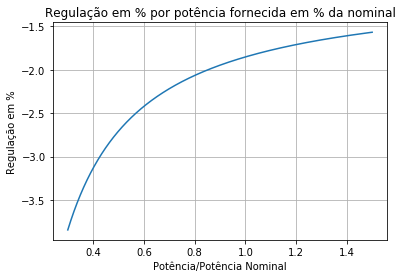

In [118]:
plt.title("Regulação em % por potência fornecida em % da nominal")
plt.xlabel("Potência/Potência Nominal")
plt.ylabel("Regulação em %")
plt.grid(True)
plt.plot(Potencia_Sobre_Nominal, regulacao)

## 3. Modelo de Fluxo Constante

### 3.1 Circuito Equivalente de Fluxo Constante

No modelo de fluxo constante, muda-se a posição da resistência R1 e do indutor de dispersão L1. Assim, o desenho do circuito equivalente é o seguinte:

<img src="Circ_Fluxo_Constante.png">

### 3.2 Cálculo do Rendimento no circuito de Fluxo Constante

In [ ]:
Rendimento_Const = []

for potencia_variada in range(120000, 600000):
    
    I_2_linha = potencia_variada/(V2*a*cos_fi)

    potencia_ferro = Rp*(Ip**2) ## aprox. constante p/ baixas frequências
        
    potencia_cobre = R_2_linha * (I_2_linha**2) + R1 * (I_2_linha**2)
    
    eta = (potencia_variada)/(potencia_variada + potencia_ferro + potencia_cobre)
    
    Rendimento_Const.append(eta)
    
Rendimento_Const = np.array(Rendimento_Const)

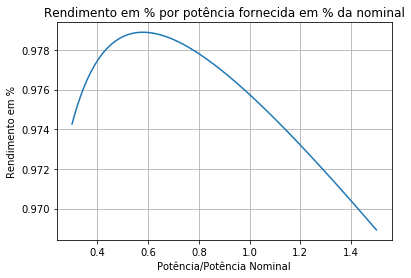

In [120]:
plt.title("Rendimento em % por potência fornecida em % da nominal")
plt.xlabel("Potência/Potência Nominal")
plt.ylabel("Rendimento em %")
plt.grid(True)
plt.plot(Potencia_Sobre_Nominal, Rendimento_Const)

### 3.3 Regulação no modelo de Fluxo Constante

In [121]:
regulacao_Const = []

for potencia_variada in range(120000, 600000):
    
    I2 = potencia_variada/(a*V2*cos_fi)
    
    Z = math.sqrt((((a*a*R2)+R1)**2) + (((((a**2)*2*math.pi*50*L2)+(2*math.pi*50*L1))**2)))
    
    tensao_variada = Z*I2
    
    r = (320 - tensao_variada)/tensao_variada
    
    regulacao_Const.append(r)
    
regulacao_Const = np.array(regulacao_Const)

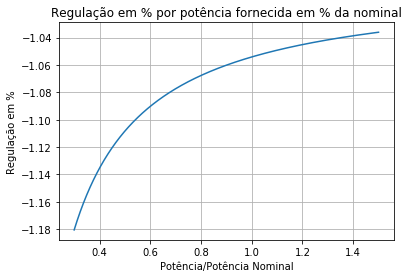

In [124]:
plt.title("Regulação em % por potência fornecida em % da nominal")
plt.xlabel("Potência/Potência Nominal")
plt.ylabel("Regulação em %")
plt.grid(True)
plt.plot(Potencia_Sobre_Nominal, regulacao_Const)

### 3.4 Comparação de Resultados

Em azul, tem-se as curva do rendimento e da regulação para o modelo de fluxo não constante. Em laranja, tem-se as curva do rendimento e da regulação para o modelo de fluxo constante.

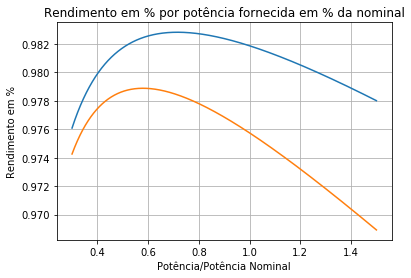

In [122]:
plt.title("Rendimento em % por potência fornecida em % da nominal")
plt.xlabel("Potência/Potência Nominal")
plt.ylabel("Rendimento em %")
plt.grid(True)
plt.plot(Potencia_Sobre_Nominal, Rendimento)
plt.plot(Potencia_Sobre_Nominal, Rendimento_Const)

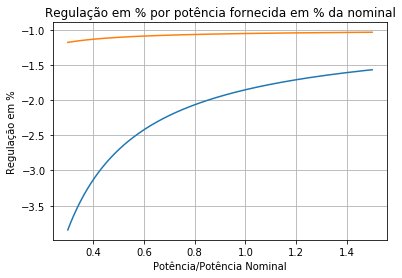

In [123]:
plt.title("Regulação em % por potência fornecida em % da nominal")
plt.xlabel("Potência/Potência Nominal")
plt.ylabel("Regulação em %")
plt.grid(True)
plt.plot(Potencia_Sobre_Nominal, regulacao)
plt.plot(Potencia_Sobre_Nominal, regulacao_Const)

## 4. Conclusões

### Modelos adotados

Para se efetuar o cálculo do rendimento no modelo de fluxo não constante, adotou-se a seguinte estratégia: considerou-se as perdas no ferro constante (devido à baixa frequência (50 Hz)), independente da variação da carga. Além disso, para efeito de simplificação nos cálculos, considerou-se a resistência equivalente no cobre como (2 x R2). Assim, conseguiu-se chegar em um modelo aproximado para o cálculo do rendimento.

Para efetuar o cálculo da regulação no modelo de fluxo não constante,  considerou-se a tensão na carga em aberto como V = 320V. Assim, para calcular o Vcarga, descontou-se a tensão que cai sobre a impedãncia de dispersão.

No modelo de fluxo constante, o cálculo do rendimento levou em conta que a corrente que passa por R1 e R2' é a mesma. Dessa forma, a resistência equivalente do cobre para essa configuração é R1 + R2. Dessa forma, chegou-se a um modelo de cálculo de rendimento.

Para a regulação, utilizou-se a mesma ideia: descontou-se as quedas de tensão nnas duas impedâncias de dispersão que estão em série.


### Comparações

Comparando-se as curvas dos modelos de fluxo não constante e fluxo constante, nota-se a diferença entre os rendimentos cálculados. No modelo de fluxo constante, o rendimento é sempre menor do que o do modelo de fluxo não constante, conforme a curva anterior.